<a href="https://colab.research.google.com/github/Anshi333/AI_assignment-3/blob/main/AI%20ASSIGNMNET%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import spacy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier
from gensim.models import KeyedVectors
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

#Loding dataset

In [2]:
# Loading the wine dataset
wine = datasets.load_wine()
wine_df = pd.DataFrame(data=np.c_[wine['data'], wine['target']], columns=wine['feature_names'] + ['target'])

#Spliting Dataset -- feature-target & train-test -- split

In [3]:
# Split the data into features and target
X = wine_df.drop('target', axis=1)
y = wine_df['target']


In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Appying algorithms

1. Linear Regression

In [8]:
# 1. Linear Regression
print("Linear Regression:")
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
y_predictions = linear_reg_model.predict(X_test)

# Evaluate the performance
linear_reg_accuracy = linear_reg_model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_predictions)
r2 = r2_score(y_test, y_predictions)

print("Accuracy:", linear_reg_accuracy)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Linear Regression:
Accuracy: 0.8825140263270391
Mean Squared Error: 0.06853348464256047
R-squared: 0.8825140263270391


2. Logistic Regression


Logistic Regression:
Accuracy: 100.0

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       1.00      1.00      1.00        14
         2.0       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


Confusion Matrix:
 [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


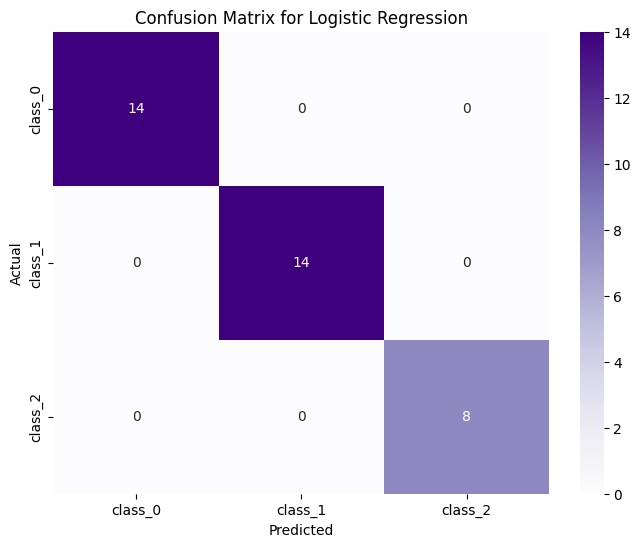

In [30]:
# 2. Logistic Regression
print("\nLogistic Regression:")
logistic_reg_model = LogisticRegression(max_iter=10000)
logistic_reg_model.fit(X_train, y_train)
y_predictions = logistic_reg_model.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_predictions)*100
classification_rep = classification_report(y_test, y_predictions)
confusion_mat = confusion_matrix(y_test, y_predictions)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", confusion_mat)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Purples', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

3. Decision Tree


Decision Tree:
Accuracy: 94.44444444444444

Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        14
         1.0       0.93      1.00      0.97        14
         2.0       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36


Confusion Matrix:
 [[13  1  0]
 [ 0 14  0]
 [ 1  0  7]]


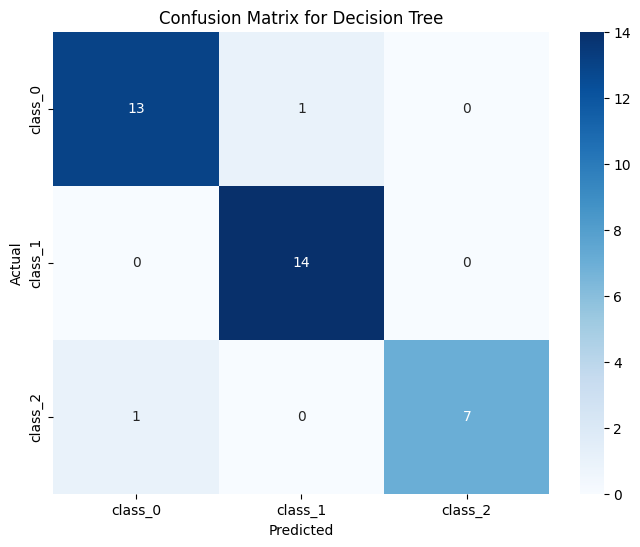

In [28]:
# 3. Decision Tree
print("\nDecision Tree:")
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_predictions = decision_tree_model.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_predictions)*100
classification_rep = classification_report(y_test, y_predictions)
confusion_mat = confusion_matrix(y_test, y_predictions)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", confusion_mat)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

4. SVM


SVM:
Accuracy: 80.55555555555556

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       0.73      0.79      0.76        14
         2.0       0.57      0.50      0.53         8

    accuracy                           0.81        36
   macro avg       0.77      0.76      0.76        36
weighted avg       0.80      0.81      0.80        36


Confusion Matrix:
 [[14  0  0]
 [ 0 11  3]
 [ 0  4  4]]


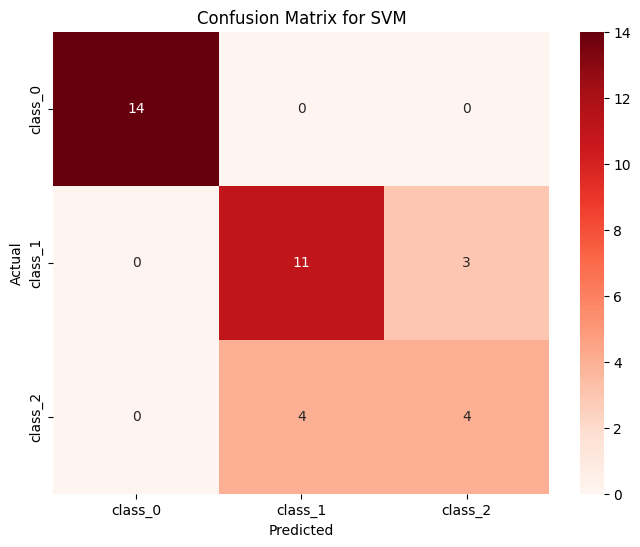

In [29]:
# 4. SVM
print("\nSVM:")
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_predictions = svm_model.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_predictions)*100
classification_rep = classification_report(y_test, y_predictions)
confusion_mat = confusion_matrix(y_test, y_predictions)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", confusion_mat)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Reds', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()

5. Naive-Bayes Algorithm


Naive-Bayes Algorithm:
Accuracy: 88.88888888888889

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      1.00      0.93        14
         1.0       0.93      0.93      0.93        14
         2.0       0.83      0.62      0.71         8

    accuracy                           0.89        36
   macro avg       0.88      0.85      0.86        36
weighted avg       0.89      0.89      0.88        36


Confusion Matrix:
 [[14  0  0]
 [ 0 13  1]
 [ 2  1  5]]


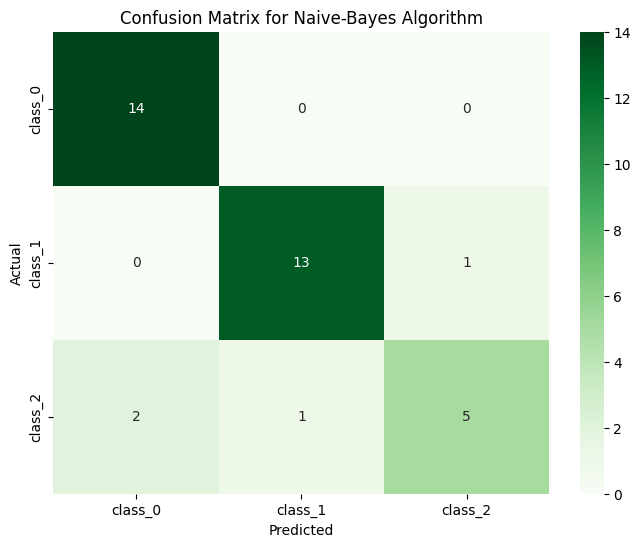

In [31]:
# 5. Naive-Bayes Algorithm
print("\nNaive-Bayes Algorithm:")
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, nb_predictions)*100
classification_rep = classification_report(y_test,nb_predictions)
confusion_mat = confusion_matrix(y_test,nb_predictions)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", confusion_mat)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Greens', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive-Bayes Algorithm')
plt.show()

#For text based algorithms

Loading Dataset

In [43]:
# Load IMDb movie reviews dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

num_samples = 800
x_train = x_train[:num_samples]
y_train = y_train[:num_samples]
x_test = x_test[:num_samples]
y_test = y_test[:num_samples]


# Convert sequences back to text
def sequences_to_texts(sequences):
    word_index = imdb.get_word_index()
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in sequences])

# Convert sequences to text
x_train_text = [sequences_to_texts(seq) for seq in x_train]
x_test_text = [sequences_to_texts(seq) for seq in x_test]

Train-Test Split

In [44]:
# Ensure y_train has the same length as x_train_text
y_train = y_train[:len(x_train_text)]

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train_text, y_train, test_size=0.2, stratify=y_train, random_state=42)

6. TF-IDF

In [46]:
# 6. TF-IDF
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), stop_words='english')
x_train_tfidf = vectorizer.fit_transform(x_train)
x_val_tfidf = vectorizer.transform(x_val)
x_test_tfidf = vectorizer.transform(x_test_text)

# Logistic Regression (as an example)
logistic_reg_model = LogisticRegression(max_iter=10000)
logistic_reg_model.fit(x_train_tfidf, y_train)

# Predictions
y_val_pred = logistic_reg_model.predict(x_val_tfidf)
y_test_pred = logistic_reg_model.predict(x_test_tfidf)

# Evaluate the model
val_accuracy = accuracy_score(y_val, y_val_pred)*100
test_accuracy = accuracy_score(y_test, y_test_pred)*100

print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy)


Validation Accuracy: 74.375
Test Accuracy: 75.625


7. Word2Vec

In [51]:
# 7. Word2Vec
# Tokenize the text
tokenized_x_train = [text.split() for text in x_train]
tokenized_x_val = [text.split() for text in x_val]
tokenized_x_test = [text.split() for text in x_test_text]

# Train model
word2vec_model = Word2Vec(sentences=tokenized_x_train, vector_size=100, window=5, min_count=1, workers=4)

# Transform each text sequence into the average Word2Vec vector
def text_to_avg_vector(text, model):
    words = text.split()
    vectors = [model.wv[word] for word in words if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        # If no word in the model, return a zero vector
        return np.zeros(model.vector_size)

# Create Word2Vec vectors for training, validation, and test sets
x_train_w2v = np.array([text_to_avg_vector(text, word2vec_model) for text in x_train])
x_val_w2v = np.array([text_to_avg_vector(text, word2vec_model) for text in x_val])
x_test_w2v = np.array([text_to_avg_vector(text, word2vec_model) for text in x_test_text])

print("Word2Vec Vector for the first training sample:")
print(x_train_w2v[0])

# Train a Logistic Regression model
logistic_reg_model = LogisticRegression(max_iter=10000)
logistic_reg_model.fit(x_train_w2v, y_train)

# Predictions
y_val_pred = logistic_reg_model.predict(x_val_w2v)
y_test_pred = logistic_reg_model.predict(x_test_w2v)

# Evaluations
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy)

Word2Vec Vector for the first training sample:
[-2.60501623e-01  4.89944994e-01 -1.15960259e-02 -6.04879223e-02
  3.98613393e-01 -1.03533506e+00  3.38087022e-01  1.08836424e+00
 -5.99113941e-01 -5.78586340e-01 -1.73153341e-01 -8.38200688e-01
 -1.49700359e-01  3.83061469e-01  1.82681516e-01 -1.25428364e-02
  3.31148237e-01 -2.93763876e-01 -1.41859157e-02 -1.30763495e+00
  3.01563978e-01 -1.14891119e-01  4.41047132e-01 -3.78908157e-01
  1.59175664e-01 -1.04198039e-01 -4.55585986e-01 -2.97838926e-01
 -5.46399176e-01  1.34140804e-01  7.74273455e-01  1.03775136e-01
  2.39452675e-01 -5.81916392e-01 -2.40499631e-01  3.42463076e-01
  1.17301486e-01 -4.37567800e-01 -2.06364200e-01 -8.88861060e-01
  5.41002691e-01 -5.66793978e-01 -7.35568330e-02  1.69497386e-01
  4.46635097e-01 -3.34588677e-01 -5.43828368e-01 -2.48461679e-01
  1.97265580e-01  5.92321277e-01  2.28874326e-01 -4.72556829e-01
 -6.96529523e-02 -1.81918323e-01 -3.73103946e-01  1.79906309e-01
  3.86913300e-01 -5.39616421e-02 -6.0020935

8. Glove Algorithm

In [56]:
# 8. Glove Algorithm
# Load pre-trained GloVe embeddings with spaCy
nlp = spacy.load("en_core_web_sm")

# Transform each text sequence into the average GloVe vector
def text_to_avg_vector(text, nlp):
    doc = nlp(text)
    vectors = [token.vector for token in doc]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        # If no vector is obtained, return a zero vector
        return np.zeros(nlp.vocab.vectors_length)

# Create GloVe vectors for training, validation, and test sets
x_train_glove = np.array([text_to_avg_vector(text, nlp) for text in x_train])
x_val_glove = np.array([text_to_avg_vector(text, nlp) for text in x_val])
x_test_glove = np.array([text_to_avg_vector(text, nlp) for text in x_test_text])

print("GloVe Vector for the first training sample:")
print(x_train_glove[0])

# Train a Logistic Regression model (as an example)
logistic_reg_model = LogisticRegression(max_iter=10000)
logistic_reg_model.fit(x_train_glove, y_train)

# Predictions
y_val_pred = logistic_reg_model.predict(x_val_glove)
y_test_pred = logistic_reg_model.predict(x_test_glove)

# Evaluations
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy)

GloVe Vector for the first training sample:
[ 1.66477233e-01 -3.17241341e-01  6.73630089e-02  1.48531750e-01
 -1.09376751e-01 -3.11614394e-01  1.01821765e-01  1.16974249e-01
  5.95108829e-02  2.16548219e-01 -1.87735945e-01 -1.27771462e-03
 -1.16288163e-01  1.96452737e-01 -1.70024946e-01 -4.51310538e-02
  1.72439739e-01 -1.07404636e-02 -1.90491620e-02  9.17453095e-02
  1.08228236e-01  3.47655505e-01 -1.16071500e-01 -4.21948284e-01
  6.69538900e-02 -2.72178262e-01  2.10364684e-01  1.10089391e-01
  2.20819876e-01  1.13416560e-01  7.15986341e-02  8.06174129e-02
  3.14722568e-01 -2.49378473e-01  7.42536113e-02 -2.88019985e-01
  7.71413893e-02 -1.44667223e-01 -4.57973294e-02 -1.26399159e-01
 -3.36126745e-01  2.92700052e-01 -1.61031559e-02  2.27942586e-01
  1.36119172e-01  1.43574357e-01 -1.36727139e-01  1.97218016e-01
 -3.18521336e-02 -4.02044579e-02 -5.20983279e-01  1.30398870e-01
 -1.23933479e-01 -9.46280733e-02 -7.38999443e-05  3.51094641e-02
  1.25813633e-01  5.04046492e-02 -1.23174852e-

9. Lemmatization - NLP


In [60]:
# 9. Lemmatization - NLP
# Load spaCy's English language model
nlp = spacy.load("en_core_web_sm")

# Define a function for lemmatization
def lemmatize_text(text, nlp):
    doc = nlp(text)
    lemmatized_text = ' '.join([token.lemma_ for token in doc])
    return lemmatized_text

# Example larger text
sample_text = """
Natural language processing (NLP) is a subfield of artificial intelligence that focuses on the interaction between computers and humans using natural language. It involves the development of algorithms and models to understand, interpret, and generate human-like language.
NLP tasks include text analysis, sentiment analysis, machine translation, named entity recognition, and more. One common preprocessing step in NLP is lemmatization, where words are reduced to their base or root form.
For example, the word "running" would be lemmatized to "run," and "better" would be lemmatized to "good." Lemmatization helps in standardizing words, reducing vocabulary size, and improving the efficiency of text analysis.
SpaCy is a popular library for NLP in Python that provides pre-trained models for lemmatization, part-of-speech tagging, and other tasks.
"""

# Lemmatize the larger text
lemmatized_sample_text = lemmatize_text(sample_text, nlp)

# Print the lemmatized text
print("Original text:")
print(sample_text)

print("\nLemmatized text:")
print(lemmatized_sample_text)

Original text:

Natural language processing (NLP) is a subfield of artificial intelligence that focuses on the interaction between computers and humans using natural language. It involves the development of algorithms and models to understand, interpret, and generate human-like language.
NLP tasks include text analysis, sentiment analysis, machine translation, named entity recognition, and more. One common preprocessing step in NLP is lemmatization, where words are reduced to their base or root form.
For example, the word "running" would be lemmatized to "run," and "better" would be lemmatized to "good." Lemmatization helps in standardizing words, reducing vocabulary size, and improving the efficiency of text analysis.
SpaCy is a popular library for NLP in Python that provides pre-trained models for lemmatization, part-of-speech tagging, and other tasks.


Lemmatized text:

 natural language processing ( NLP ) be a subfield of artificial intelligence that focus on the interaction betwe

10. Recurrent NN

In [63]:
# 10. Recurrent NN
# Load IMDb movie reviews dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# Limit the dataset for faster execution (you can adjust this based on your resources)
num_samples = 5000
x_train = x_train[:num_samples]
y_train = y_train[:num_samples]
x_test = x_test[:num_samples]
y_test = y_test[:num_samples]
# Pad sequences to have the same length
maxlen = 100
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Define the RNN model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the RNN model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy*100)

Epoch 1/5
63/63 [==============================] - 9s 107ms/step - loss: 0.6638 - accuracy: 0.6035 - val_loss: 0.5757 - val_accuracy: 0.7430
Epoch 2/5
63/63 [==============================] - 4s 62ms/step - loss: 0.4304 - accuracy: 0.8232 - val_loss: 0.4328 - val_accuracy: 0.8020
Epoch 3/5
63/63 [==============================] - 4s 62ms/step - loss: 0.2306 - accuracy: 0.9178 - val_loss: 0.4811 - val_accuracy: 0.7920
Epoch 4/5
63/63 [==============================] - 5s 84ms/step - loss: 0.1228 - accuracy: 0.9640 - val_loss: 0.5411 - val_accuracy: 0.8010
Epoch 5/5
157/157 [==============================] - 2s 12ms/step - loss: 0.6314 - accuracy: 0.7832
Test Accuracy: 78.32000255584717
